## Netflix Movies and TV Shows - EDA

* Source: https://www.kaggle.com/shivamb/netflix-shows

All TV Shows and Movies meta data on Netflix. Updated every month.

## Questions

How many tv shows are there in the dataset?

[Show_id](#show_id)

What are the types?

[Type](#type)

I will only analyze the data about movies.

Are there movies with the same name?

[Title](#title)

What are the directors with most movies produced?

[Director](#director)

What are the actors/cast who has done more movies?

[Cast](#cast)

What are the months in which more movies are added?

[Date Added](#date_added)

When the movies were released?

[Release Year](#release_year)


What is the movies' duration?

[Duration](#duration)


What are the main genres?

[Genre](#listed_in)

What are the movies about?

[Description](#description)

In [1]:
# open libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# open df
df = pd.read_csv('C:/Users/camil/Desktop/dados/netflix.csv', encoding = 'latin1', engine = 'python', delimiter = ',')

In [3]:
# print 4 first rows 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
# print info about 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


#### show_id      

Unique ID for every Movie / Tv Show

6234 non-null

**There are 6234 tv shows in the dataset.**

In [5]:
# check if there's repetead values
## as expected, there aren't repetead values.

df.show_id.value_counts()

80218111    1
81010662    1
80188051    1
70077076    1
80192149    1
           ..
80993613    1
80176929    1
81001809    1
80162131    1
80992499    1
Name: show_id, Length: 6234, dtype: int64

#### type     

Identifier - A Movie or TV Show

6234 non-null   object

In [6]:
df.type.value_counts()/len(df)*100

Movie      68.415143
TV Show    31.584857
Name: type, dtype: float64

In [7]:
## a new dataset with only movies.
df_netflix = df[(df.type == 'Movie')]

#### title        

Title of the Movie / Tv Show

4265 non-null   object

In [8]:
df_netflix.title.describe()

count            4265
unique           4241
top       The Silence
freq                3
Name: title, dtype: object

In [9]:
df_netflix[(df_netflix.title == "The Silence")]
#there's one movie repetead, thus I'll drop one row.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2387,80244078,Movie,The Silence,Gajendra Ahire,"Raghuvir Yadav, Nagraj Manjule, Anjali Patil, ...",India,"March 1, 2018",2017,TV-MA,90 min,"Dramas, International Movies","On a train in Mumbai, 20-something Chini witne..."
2388,80238292,Movie,The Silence,Gajendra Ahire,"Raghuvir Yadav, Nagraj Manjule, Anjali Patil, ...",India,"March 1, 2018",2015,TV-MA,91 min,"Dramas, International Movies","After encountering a scene of sexual violence,..."
5464,81021447,Movie,The Silence,John R. Leonetti,"Stanley Tucci, Kiernan Shipka, Miranda Otto, K...",Germany,"April 10, 2019",2019,TV-14,91 min,"Horror Movies, Thrillers",With the world under attack by deadly creature...


In [10]:
df_netflix = df_netflix[(df_netflix.show_id != '80238292')]

C:\Users\camil\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


#### director   

Director of the Movie

4137 non-null object

In [11]:
df_netflix.director.describe()

count                        4137
unique                       3198
top       RaÃºl Campos, Jan Suter
freq                           18
Name: director, dtype: object

In [12]:
#print the movies directed by RaÃºl Campos and Jan Suter together.
df_netflix[(df_netflix.director == "RaÃºl Campos, Jan Suter")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1337,80183088,Movie,Mea Culpa,"RaÃºl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
1655,80192137,Movie,Fernando Sanjiao: Hombre,"RaÃºl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
1794,80192065,Movie,Carlos Ballarta: Furia Ãera,"RaÃºl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
2035,80183197,Movie,SofÃ­a NiÃ±o de Rivera: SelecciÃ³n Natural,"RaÃºl Campos, Jan Suter",SofÃ­a NiÃ±o de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's SofÃ­a NiÃ±o de Rivera brings her dar...
2133,80192139,Movie,Malena Pichot: Estupidez compleja,"RaÃºl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
2134,80192063,Movie,Natalia Valdebenito: El especial,"RaÃºl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...
2504,80191989,Movie,Jani DueÃ±as: Grandes fracasos de ayer y hoy,"RaÃºl Campos, Jan Suter",Jani DueÃ±as,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani DueÃ±as ...
2550,80097641,Movie,SofÃ­a NiÃ±o de Rivera: Exposed,"RaÃºl Campos, Jan Suter",SofÃ­a NiÃ±o de Rivera,Mexico,"June 24, 2016",2016,TV-MA,80 min,Stand-Up Comedy,Self-deprecating comic SofÃ­a NiÃ±o de Rivera ...
2783,80192064,Movie,Luciano Mellera: Infantiloide,"RaÃºl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
2834,80192135,Movie,Coco y Raulito: Carrusel de ternura,"RaÃºl Campos, Jan Suter","Coco Celis, RaÃºl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."


In [13]:
#create a df that split the director column
df_director = df_netflix.assign(var1 = df_netflix.director.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_director['var1'] = df_director.var1.str.lstrip()

Text(0, 0.5, '')

C:\Users\camil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\camil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


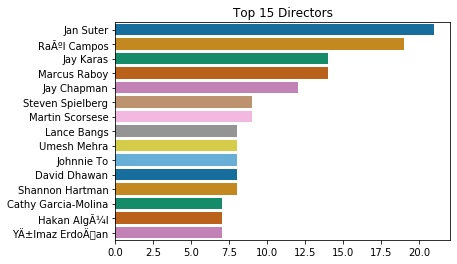

In [14]:
sns.countplot(y = df_director.var1, order=df_director.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('Top 15 Directors')
plt.xlabel('')
plt.ylabel('')

#### cast          

Actors involved in the movie / show

3905 non-null object

In [15]:
df_netflix.cast.describe()

count            3905
unique           3763
top       Samuel West
freq               10
Name: cast, dtype: object

In [16]:
#create a df that split the cast column
df_cast = df_netflix.assign(var1=df_netflix.cast.str.split(',')).explode('var1').reset_index(drop=True)

#To remove white space at the beginning of string:
df_cast['var1'] = df_cast.var1.str.lstrip()

Text(0.5, 1.0, 'Top 15 Actors')

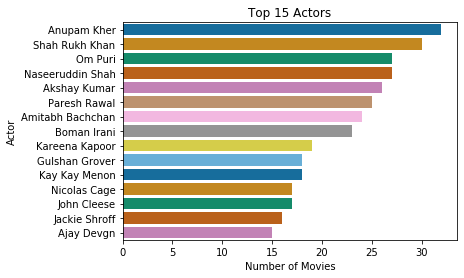

In [17]:
#plot the top 15 actors with the most movies.
sns.countplot(y = df_cast.var1, order=df_cast.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 15 Actors')

In the plot above, we've plotted the number of movies that each actor worked. Most of them have Indian names.

####  country     

Country where the movie / show was produced

4070 non-null object

In [18]:
df_netflix.country.describe()

count              4070
unique              482
top       United States
freq               1482
Name: country, dtype: object

In [19]:
#create a df that split the country column
df_country = df_netflix.assign(var1=df_netflix.country.str.split(',')).explode('var1').reset_index(drop=True)

#To remove white space at the beginning of string:
df_country['var1'] = df_country.var1.str.lstrip()

In [20]:
df_country.var1.value_counts()/len(df_country)*100

United States     35.544061
India             14.465176
United Kingdom     7.001663
Canada             3.898023
France             3.713283
                    ...    
Armenia            0.018474
Samoa              0.018474
Somalia            0.018474
Malawi             0.018474
Albania            0.018474
Name: var1, Length: 105, dtype: float64

Text(0.5, 1.0, 'Top 15 Countries')

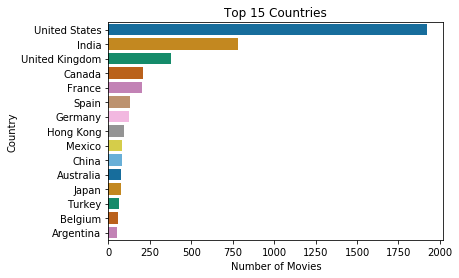

In [21]:
#plot the top 15 countries with the most movies produced.
sns.countplot(y = df_country.var1, order=df_country.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 15 Countries')

The United States is the country with the most number of movies, followed by India and the United Kingdom.

#### date_added    

Date it was added on Netflix

4264 non-null datetime64

In [22]:
## convert to date
df_netflix['date_added']= df_netflix.date_added.astype('datetime64') 

## get only the year
df_netflix['date_added_year'] = df_netflix.date_added.dt.year

## get only the month
df_netflix['date_added_month'] = df_netflix.date_added.dt.month

Text(0.5, 0, 'Year')

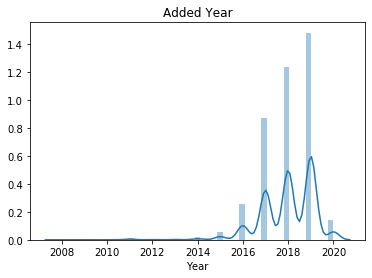

In [23]:
## plot a density plot
sns.distplot(df_netflix.date_added_year)
plt.title('Added Year')
plt.xlabel("Year")

Netflix has addded movies since 2008, from 2016 there's an expressive growth trend.

Text(0.5, 0, 'Month')

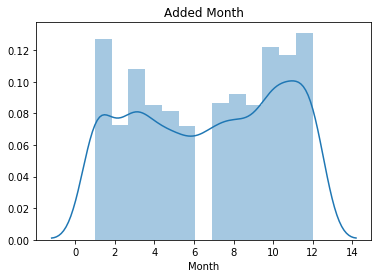

In [24]:
## plot a density plot
sns.distplot(df_netflix.date_added_month)
plt.title('Added Month')
plt.xlabel("Month")

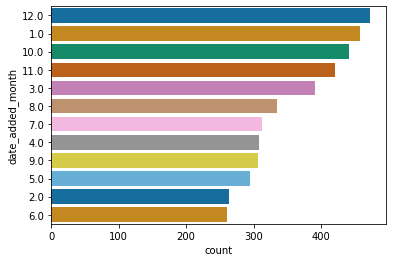

In [25]:
# plot the number of movies added grouped by month 
#set order by the number of movies descending
sns.countplot(y=df_netflix.date_added_month, palette = 'colorblind', order = df_netflix.date_added_month.value_counts().index)

Netflix adds more movies in December, January, October and November. Thus, in the end of the year.

### release_year

Actual Release year of the move / show

4265 non-null

Text(0.5, 0, 'Year')

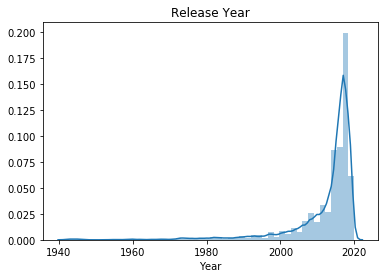

In [26]:
sns.distplot(df_netflix.release_year)
plt.title('Release Year')
plt.xlabel('Year')

Most of the movies were released from 2017.

#### rating        

TV Rating of the movie / show

4257 non-null

In [27]:
df_netflix.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-14', 'R', 'TV-Y7', 'TV-Y', 'NR', 'PG-13',
       'TV-G', 'PG', 'G', nan, 'UR', 'TV-Y7-FV', 'NC-17'], dtype=object)

Text(0, 0.5, '')

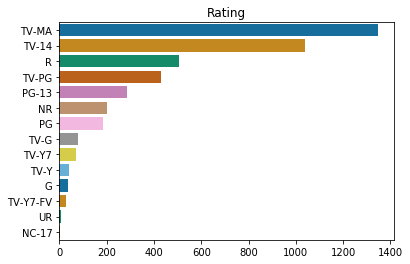

In [28]:
sns.countplot(y = df_netflix.rating, palette = 'colorblind', order = df_netflix.rating.value_counts().index)
plt.title('Rating')
plt.xlabel('')
plt.ylabel('')

#### duration

Total Duration - in minutes or number of seasons

In [29]:
df_netflix['duration'] = df_netflix.duration.str.rstrip('min').astype(float)

#df_disney.runtime.str.rstrip('min')

Text(0.5, 0, 'Duration')

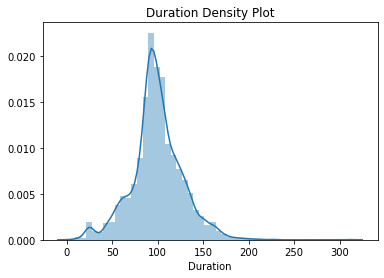

In [30]:
# duration density plot
sns.distplot(df_netflix.duration)
plt.title('Duration Density Plot')
plt.xlabel('Duration')

#### listed_in         

Genres

4265 non-null   object   

In [31]:
df_netflix.listed_in.describe()

count              4265
unique              249
top       Documentaries
freq                299
Name: listed_in, dtype: object

In [32]:
#create a df that split the listed column
df_list = df_netflix.assign(var1 = df_netflix.listed_in.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_list['var1'] = df_list.var1.str.lstrip()

In [33]:
df_list.var1.value_counts()/len(df_list)*100

International Movies        21.154902
Dramas                      17.817543
Comedies                    12.218685
Documentaries                7.333407
Action & Adventure           6.553958
Independent Movies           6.059941
Thrillers                    4.303436
Children & Family Movies     4.149742
Romantic Movies              4.127786
Stand-Up Comedy              3.084861
Horror Movies                2.876276
Music & Musicals             2.667691
Sci-Fi & Fantasy             2.118784
Sports Movies                1.723570
Classic Movies               0.922165
LGBTQ Movies                 0.658689
Movies                       0.614777
Cult Movies                  0.603798
Faith & Spirituality         0.515973
Anime Features               0.494017
Name: var1, dtype: float64

21.16% of the movies are International Movies, 17.82% are Dramas and 12.22% are Comedies.

Text(0, 0.5, '')

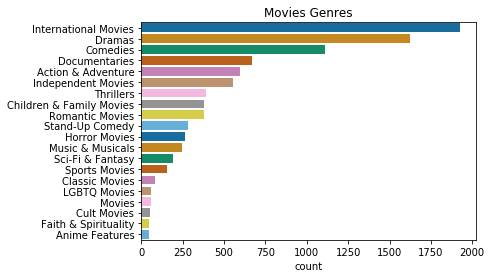

In [34]:
sns.countplot(y = df_list.var1, palette = 'colorblind', order = df_list.var1.value_counts().index)
plt.title('Movies Genres')
plt.ylabel('')

#### description       
 
 The summary description
 
 4265 non-null   object      

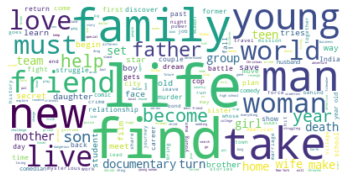

In [35]:
# plot the most frequent words in the movies

# combine multiple rows into one object
text = df_netflix['description'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["one", "two", "three", "four", "five"])

# Create and generate a word cloud image:
wc= WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("netflix.png")
#adapted code from: https://www.datacamp.com/community/tutorials/wordcloud-python